# Ajustes linear da dados experimentais de Arrhenius

In [13]:
# importando os pacotes do python
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Lendo o arquivo csv na pasta
dados = pd.read_csv('Arrhenius.csv')

In [15]:
#transformando data frame em vetor
dados_np = dados.values

In [16]:
#vetor do eixo x
x = 1/dados_np[:,0]

In [17]:
#vetor do eixo y
y = np.log(dados_np[:,1])

In [18]:
linear_p = np.polyfit(x, y, 1)

In [19]:
Ea = linear_p[0] *(-8.314) # Estimativa da energia de ativação em J /mol
print(Ea)

121481.5094181364


In [20]:
A = np.exp(linear_p[1]) # Fator de frequencia
print (A)

8.030276391879293e+16


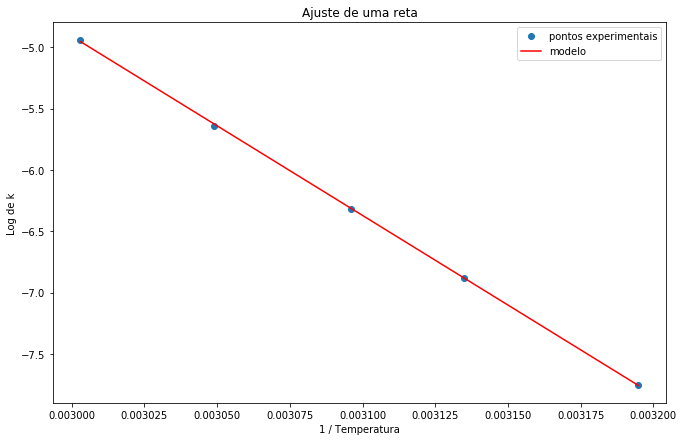

In [21]:
#impressão dos dados experimentais e do modelo linear
plt.plot(x, y, "o", label = "pontos experimentais")
plt.plot(x, np.polyval(linear_p, x), "-r", label = "modelo")
plt.xlabel("1 / Temperatura")
plt.ylabel("Log de k")
plt.rcParams['figure.figsize'] = (11,7)
plt.title("Ajuste de uma reta")
plt.legend()
plt.show()

In [22]:
yfit = linear_p[0] * x + linear_p[1] # calcula os valores preditos
yresid = y - yfit # resíduo = valor real - valor ajustado (valor predito)
SQresid = sum(pow(yresid,2)) # soma dos quadrados dos resíduos 
SQtotal = len(y) * np.var(y) # número de elementos do vetor y vezes a variância de y
R2 = 1 - SQresid/SQtotal # coeficiente de determinação
print(R2) # imprime coeficiente de determinação


0.9998570770329075


In [24]:
#dados do modelo ajustado
dados_v = np.transpose(np.exp(yfit))
dados_df = pd.DataFrame({"Temperatura":dados_np[:,0], "velocidade_mod":dados_v, "velocidade_exp":dados_np[:,1]})
print(dados_df)

Temperatura  velocidade_mod  velocidade_exp
0        313.0        0.000427         0.00043
1        319.0        0.001028         0.00103
2        323.0        0.001813         0.00180
3        328.0        0.003613         0.00355
4        333.0        0.007053         0.00717


In [26]:
print(f'A energia de ativação é: {Ea:9.7} Joules/mol')
print(f'O fator de frequencia é: {A:9.5} 1/s')
print(f'O Coeficiente de ajuste é: {R2:5.5}')

A energia de ativação é:  121481.5 Joules/mol
O fator de frequencia é: 8.0303e+16 1/s
O Coeficiente de ajuste é: 0.99986
